<div style="text-align: center"> <h1> Assignment - 4</div>

<div style="text-align: center"> <h3>CS677 A1 Data Science with Python (Fall 2024)

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

### **Part - 1 Classifiers for Iris**

##### **Solution - 1: 1**

In [92]:
import pandas as pd

In [93]:
import numpy as np

In [94]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [95]:
from urllib.request import urlretrieve
urlretrieve(iris)

('/tmp/tmp3lp1lpoh', <http.client.HTTPMessage at 0x79dbc75a9360>)

In [96]:
df = pd.read_csv(iris, sep=',')

In [97]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
df = df[df['class'].isin(['Iris-versicolor', 'Iris-virginica'])].copy()
df.loc[:, 'Label']= df['class'].map({'Iris-versicolor': 0, 'Iris-virginica':1})
df

,sepal_length,sepal_width,petal_length,petal_width,class,Label
49,7.0,3.2,4.7,1.4,Iris-versicolor,0
50,6.4,3.2,4.5,1.5,Iris-versicolor,0
51,6.9,3.1,4.9,1.5,Iris-versicolor,0
52,5.5,2.3,4.0,1.3,Iris-versicolor,0
53,6.5,2.8,4.6,1.5,Iris-versicolor,0
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,1
145,6.3,2.5,5.0,1.9,Iris-virginica,1
146,6.5,3.0,5.2,2.0,Iris-virginica,1
147,6.2,3.4,5.4,2.3,Iris-virginica,1


##### **Solution - 1: 2**

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [99]:
# Training & Testing sets - 50/50
X = df.drop(['class', 'Label'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [101]:
# Create a dataframe
train_df = pd.concat([X_train, y_train], axis=1)

In [102]:
# Calculate statistical measure
def stats(feature):
  µ0 = train_df[train_df['Label'] == 0][feature].mean()
  σ0 = train_df[train_df['Label']== 0][feature].std()
  µ1 = train_df[train_df['Label'] == 1][feature].mean()
  σ1 = train_df[train_df['Label']== 1][feature].std()
  µall = train_df[feature].mean()
  σall = train_df[feature].std()
  return µ0, σ0, µ1, σ1, µall, σall

In [103]:
table1 = {
    'Feature': ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    'µ0': [stats(feature)[0] for feature in X_train.columns],
    'σ0': [stats(feature)[1] for feature in X_train.columns],
    'µ1': [stats(feature)[2] for feature in X_train.columns],
    'σ1': [stats(feature)[3] for feature in X_train.columns],
    'µall': [stats(feature)[4] for feature in X_train.columns],
    'σall': [stats(feature)[5] for feature in X_train.columns]
}
table_1 = pd.DataFrame(table1)
print('Table 1: Statistical Measurements')
table_1

Table 1: Statistical Measurements


,Feature,µ0,σ0,µ1,σ1,µall,σall
0,sepal_length,5.980,0.504297,6.493333,0.643232,6.288,0.638762
1,sepal_width,2.825,0.304138,2.990000,0.332545,2.924,0.328609
2,petal_length,4.195,0.530615,5.563333,0.526854,5.016,0.855560
3,petal_width,1.310,0.204939,2.053333,0.278832,1.756,0.444541


##### **Solution - 1: 3**

In [104]:
# Separate data for each class
class_0 = train_df[train_df['Label'] == 0]
class_1 = train_df[train_df['Label'] == 1]

In [105]:
corr_matrix_0 = class_0[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
corr_matrix_1 = class_1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

In [106]:
corr_matrix_0

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.583362,0.835535,0.557125
sepal_width,0.583362,1.000000,0.656344,0.738855
petal_length,0.835535,0.656344,1.000000,0.736158
petal_width,0.557125,0.738855,0.736158,1.000000


In [107]:
corr_matrix_1

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.476850,0.857026,0.213538
sepal_width,0.476850,1.000000,0.385564,0.522871
petal_length,0.857026,0.385564,1.000000,0.248502
petal_width,0.213538,0.522871,0.248502,1.000000


**💡Interpretation of Correlation Table💡-**

> Class 0 (Iris-versicolor):
*   Highest Correlation: ('sepal_length', 'petal_length') with value 0.8355
*   Lowest Correlation: ('sepal_length', 'petal_width') with value 0.5571
>




>Class 1 (Iris-virginica):
*   Highest Correlation: ('sepal_length', 'petal_length') with value 0.8570
*   Lowest Correlation: ('sepal_length', 'petal_width') with value 0.2135

##### **Solution - 1.4**

**💡Findings💡-**

Iris-versicolor exhibits stronger overall correlations between fetures compared to Iris-virginica. This suggests that in Iris-versicolor, the features are more interrelated, potentially making it easier to predict one feature based on another. Conversely, the more independent relationships in Iris-virginica indicate that the features provide distinct information am may required nuanced approach for classification.

##### **Solution - 2.1**

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

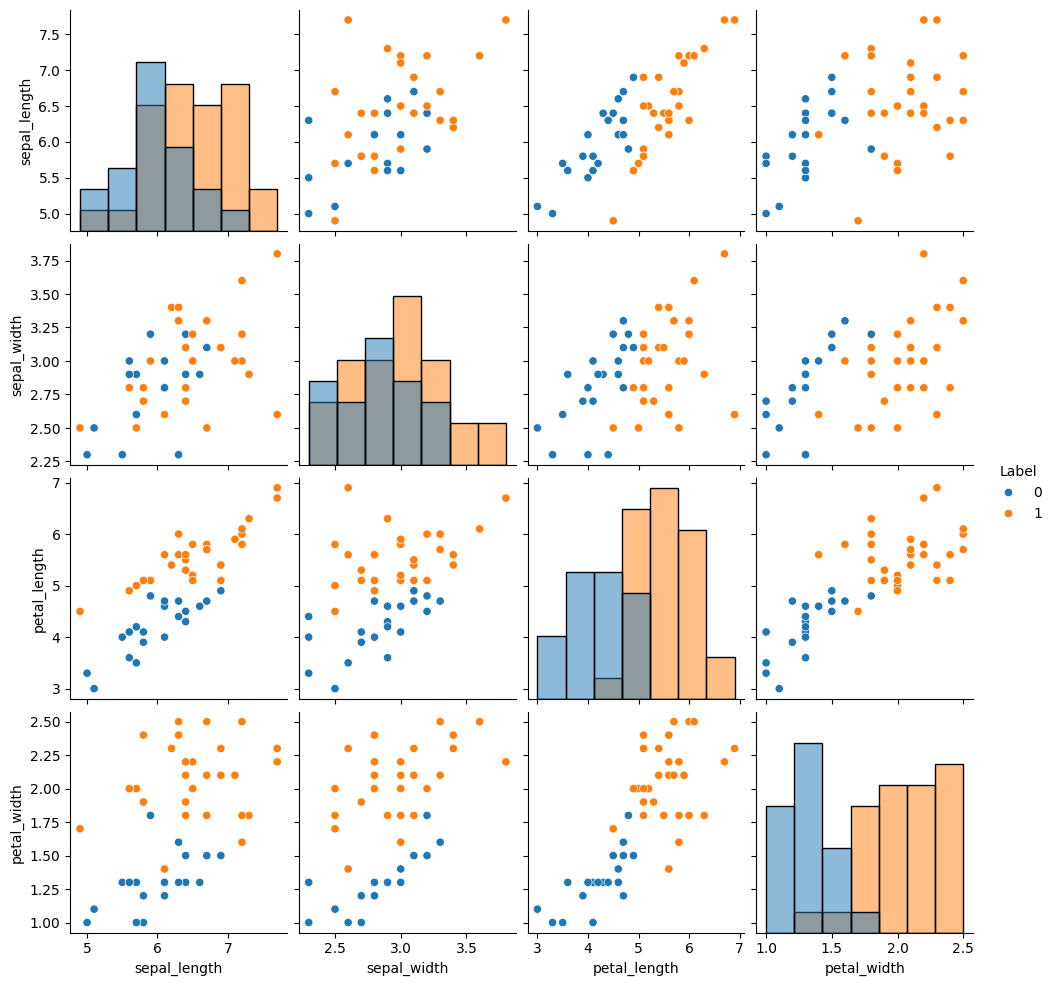

In [109]:
# Generate pairplot
sns.pairplot(train_df, hue='Label', diag_kind='hist')
plt.show()

**💡Interpretation of Histogram💡-**

**Iris-Versicolor (label 0) and Iris-Virginica (label 1)**

1. **Petal Length:** shows a clear distinction between the two classes, as seen in both scatter plot and the histogram. There is minimal overlap in the histogram, suggesting that this feature might be most effective for classifying between Iris-Versicolor and Iris-Virginica.

2. **Petal Width:** shows a resonable separation it is useful feature for classification, although not as effective as petal length.

3. **Sepal Length:** there is a noticible overlap between both the classes so this feature is less effective in classification.

4. **Sepal Width:** Has the most overlap so this feature is the least useful feature for distinguishing between both classes.


##### **Solution - 2.2**

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
def petal_length_classifier (petal_length):
    if petal_length < 5:
        return 0
    else:
        return 1

def petal_width_classifier (petal_width):
    if petal_width < 1.5:
        return 0
    else:
        return 1

def sepal_length_classifier (sepal_length):
    if sepal_length < 5.75:
        return 0
    else:
        return 1

def sepal_width_classifier (sepal_width):
    if sepal_width < 2.75:
        return 0
    else:
        return 1

def apply_classifiers(classifier_func, feature, X_test):
  return X_test[feature].apply(classifier_func)

def evaluate_classifier(classifier__func, feature, X_test):
  y_pred = apply_classifiers(classifier__func, feature, X_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  TN, FP, FN, TP = cm.ravel()
  return TP, TN, FP, FN, accuracy

week_learners = pd.DataFrame(columns=['Feature', 'TP', 'TN', 'FP', 'FN', 'Accuracy'])

week_learners.loc[len(week_learners)] = ['petal_length', *evaluate_classifier(petal_length_classifier, 'petal_length', X_test)]
week_learners.loc[len(week_learners)] = ['petal_width', *evaluate_classifier(petal_width_classifier, 'petal_width', X_test)]
week_learners.loc[len(week_learners)] = ['sepal_length', *evaluate_classifier(sepal_length_classifier, 'sepal_length', X_test)]
week_learners.loc[len(week_learners)] = ['sepal_width', *evaluate_classifier(sepal_width_classifier, 'sepal_width', X_test)]
print("Results for single-feature Week Learners Results:")
week_learners

Results for single-feature Week Learners Results:


,Feature,TP,TN,FP,FN,Accuracy
0,petal_length,16,28,2,4,0.88
1,petal_width,20,20,10,0,0.80
2,sepal_length,20,14,16,0,0.68
3,sepal_width,17,14,16,3,0.62


**💡Findings💡-**

The "weak" learners are ranked on the basis of accuracy.

1. **Petal Length:** Has the highest accuracy 0.88 and perfoms well in distinguishing between the 2 classes with only 4 false negatives and 2 false positive. This aligns with the visulization, where petal length showing most separation between the 2 classes.

2. **Petal Width:** Accuracy of 0.80, although it results in more false positive 10, it has 0 false negative, meaning it correctly identifies all instances of Iris -Versicolor.

3. **Sepal Length:** Performs less effectively, withnlower accuracy of 0.68. It results in a significant number of false positive 16, meaning many Iris-Virginica instances are misclassified as Iris-Versicolor.

4. **Sepal Width:** Least effective feature, with accuracy of 0.62. Has significant false positives 16, and false negative 3, indicating this feature is not suitable for single-feature classification.

##### **Solution - 3.1**

In [35]:
from itertools import combinations
from scipy.stats import mode
import pandas as pd

classifiers = [petal_length_classifier, petal_width_classifier, sepal_length_classifier, sepal_width_classifier]
features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']

# Create combinations of 3 classifiers:
combinations_of_classifiers = list(combinations(range(len(classifiers)), 3))

# Function to compute majority decision for ensemble of classifiers
def ensemble_classifier(classifier_funcs, features, X_test):
    predictions = [apply_classifiers(classifier_funcs[i], features[i], X_test) for i in range(3)]
    ensemble_predictions = mode(predictions, axis=0)[0].flatten()
    return ensemble_predictions

# Evaluate ensemble classifiers and return confusion matrix with results
def evaluate_ensemble(classifier_funcs, features, X_test):
    y_pred = ensemble_classifier(classifier_funcs, features, X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return TP, TN, FP, FN, accuracy, cm

# Dataframe for results
ensemble_results = pd.DataFrame(columns=['Ensemble', 'TP', 'TN', 'FP', 'FN', 'Accuracy'])
ensemble_results = ensemble_results.sort_values(by='Accuracy', ascending=False)

# Loop through each combination and evaluate
for combo in combinations_of_classifiers:
    selected_classifiers = [classifiers[i] for i in combo]
    selected_features = [features[i] for i in combo]
    TP, TN, FP, FN, accuracy, cm = evaluate_ensemble(selected_classifiers, selected_features, X_test)
    ensemble_results.loc[len(ensemble_results)] = [f"({combo[0]+1},{combo[1]+1},{combo[2]+1})", TP, TN, FP, FN, accuracy]

    # Now print the confusion matrix for each ensemble
    print(f"Confusion Matrix for Ensemble ({combo[0]+1},{combo[1]+1},{combo[2]+1}):")
    print(cm, "\n")

Confusion Matrix for Ensemble (1,2,3):
[[22  8]
 [ 0 20]] 

Confusion Matrix for Ensemble (1,2,4):
[[22  8]
 [ 1 19]] 

Confusion Matrix for Ensemble (1,3,4):
[[18 12]
 [ 1 19]] 

Confusion Matrix for Ensemble (2,3,4):
[[14 16]
 [ 0 20]] 



In [36]:
print("Table 3: Results for ensembles of 'Weak' Learners")
ensemble_results

Table 3: Results for ensembles of 'Weak' Learners


,Ensemble,TP,TN,FP,FN,Accuracy
0,"(1,2,3)",20,22,8,0,0.84
1,"(1,2,4)",19,22,8,1,0.82
2,"(1,3,4)",19,18,12,1,0.74
3,"(2,3,4)",20,14,16,0,0.68


**💡Findings💡-**

**Weak Learners:**
*   Among individual weak learners, petal length (Accuracy 0.88) and petal width (Accuracy 0.80) showed best performance.

**Weak Learner Ensemble Classifier:**
*   Ensemble models improves the classification accuracy by combining weak learners. Even though petal length and petal width were most effective individual features, combining them with less effective feature like sepal lenth and sepal width inensembles still resulted in reasonable good accuracy.


*   Ensemble **0 (1,2,3)** achieves 0.84 accuracy nearly matching best weak learner (petal length). However, this combination reduces false negatives to zero, making it a stong choice for classification tasks where missing true positives is costly.



##### **Solution - 4.1**

In [40]:
from scipy.stats import norm

# Function to create a density-based classifier for a given feature
def density_based_classifier(feature, X_test, X_train):
    # Compute mean and standard deviation for class 0 and class 1
    µ0, σ0 = X_train[train_df['Label'] == 0][feature].mean(), X_train[train_df['Label'] == 0][feature].std()
    µ1, σ1 = X_train[train_df['Label'] == 1][feature].mean(), X_train[train_df['Label'] == 1][feature].std()

    def classifier(x):
        # Compute p0(x) and p1(x)
        p_0 = norm.pdf((x - µ0) / σ0)
        p_1 = norm.pdf((x - µ1) / σ1)

        # Assign label based on higher probability density
        return 0 if p_0 >= p_1 else 1

    return X_test[feature].apply(classifier)

# Evaluate the density-based classifier for a given feature
def evaluate_density_based_classifier(feature, X_test, X_train):
    y_pred = density_based_classifier(feature, X_test, X_train)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return TP, TN, FP, FN, accuracy

# Store results for each density-based classifier
density_results = pd.DataFrame(columns=['Feature', 'TP', 'TN', 'FP', 'FN', 'Accuracy'])

# Loop through the features and evaluate each density-based classifier
for feature in ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']:
    TP, TN, FP, FN, accuracy = evaluate_density_based_classifier(feature, X_test, X_train)
    density_results.loc[len(density_results)] = [feature, TP, TN, FP, FN, accuracy]

density_results = density_results.sort_values(by='Accuracy', ascending=False)

# Display the results
print("Table 4: Results for Density-Based Classifiers")
density_results

Table 4: Results for Density-Based Classifiers


,Feature,TP,TN,FP,FN,Accuracy
1,petal_width,18,29,1,2,0.94
0,petal_length,18,27,3,2,0.90
2,sepal_length,16,23,7,4,0.78
3,sepal_width,12,21,9,8,0.66


**💡Findings💡-**

Desnsity-Based classifiers seem to be doing better than the week learners

1. **Petal Width:** Accuracy of 0.94, with only 1 false positive, 2 false negative, highly effective feature for classifying 2 Iris species. It performs well both in terms of correctly identifying true positives and true negatives.

2. **Petal Length:** Accracy 0.90, It misclassifies 3 samples as false positives but maintains the same number of false negatives as petal width, making it another reliable feature for density-based classification

3. **Sepal Length:** Accuracy 0.78. Performs better than weak learner with accuracy of 0.68. misclassifies 7 false positives and 4 false negative.

4. **Sepal Width:** Least effective feature, with accuracy of 0.66. Has significant false positives 9, and false negative 8, indicating this feature is not suitable for single-feature classification.

##### **Solution - 5.1**

In [41]:
from itertools import combinations
from scipy.stats import mode

# Function to apply majority voting on density-based classifiers
def density_based_ensemble(classifier_funcs, features, X_test, X_train):
    # Collect predictions from each of the classifiers
    predictions = [density_based_classifier(features[i], X_test, X_train) for i in range(3)]

    # Compute majority vote (mode) across the classifiers
    ensemble_predictions = mode(predictions, axis=0)[0].flatten()

    return ensemble_predictions

# Function to evaluate density-based ensemble classifiers
def evaluate_density_based_ensemble(classifier_funcs, features, X_test, X_train):
    y_pred = density_based_ensemble(classifier_funcs, features, X_test, X_train)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return TP, TN, FP, FN, accuracy, cm

# List of features and create combinations of 3 classifiers
features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
combinations_of_classifiers = list(combinations(range(len(features)), 3))

# Initialize a DataFrame to store ensemble results
density_ensemble_results = pd.DataFrame(columns=['Ensemble', 'TP', 'TN', 'FP', 'FN', 'Accuracy'])

# Loop through each combination and evaluate density-based ensemble classifiers
for combo in combinations_of_classifiers:
    selected_features = [features[i] for i in combo]
    TP, TN, FP, FN, accuracy, cm = evaluate_density_based_ensemble(density_based_classifier, selected_features, X_test, X_train)
    density_ensemble_results.loc[len(density_ensemble_results)] = [f"({combo[0]+1},{combo[1]+1},{combo[2]+1})", TP, TN, FP, FN, accuracy]

    # Print confusion matrix for each ensemble
    print(f"Confusion Matrix for Density-Based Ensemble ({combo[0]+1},{combo[1]+1},{combo[2]+1}):")
    print(cm, "\n")

Confusion Matrix for Density-Based Ensemble (1,2,3):
[[28  2]
 [ 3 17]] 

Confusion Matrix for Density-Based Ensemble (1,2,4):
[[29  1]
 [ 3 17]] 

Confusion Matrix for Density-Based Ensemble (1,3,4):
[[25  5]
 [ 3 17]] 

Confusion Matrix for Density-Based Ensemble (2,3,4):
[[26  4]
 [ 3 17]] 



In [43]:
# Rank ensembles by accuracy
density_ensemble_results = density_ensemble_results.sort_values(by='Accuracy', ascending=False)
print("Table 5: Results for Density-based Ensembles")
density_ensemble_results

Table 5: Results for Density-based Ensembles


,Ensemble,TP,TN,FP,FN,Accuracy
1,"(1,2,4)",17,29,1,3,0.92
0,"(1,2,3)",17,28,2,3,0.90
3,"(2,3,4)",17,26,4,3,0.86
2,"(1,3,4)",17,25,5,3,0.84


**💡Findings💡-**

Desnsity-Based Ensemble classifiers seem to be doing better than the week learners ensemble

Ensemble (1,2,4) has the highest accuracy 0.92, close to  the best individual classsifier (petal width).

Across all ensembles, **density-based classifiers outperform weak learner ensembles.** The most significant improvement is in the ensemble (2,3,4), where the accuracy jumps from 0.68 (weak learners) to 0.86 (density-based), demonstrating the ability of density-based classifiers to better handle combinations of weaker features.

The ensemble (1,2,4) consistently performs best in both weak learners and density-based classifiers, improving from 0.82 to 0.92. This is a powerful combination because petal features are strong classifiers, and the inclusion of sepal width further refines the model.

In [44]:
# Compare weak learners and ensemble results
print("Weak Learners Results:")
print(density_results)

print("\nTable 5: Results for Density-based Ensembles")
print(density_ensemble_results)

Weak Learners Results:
        Feature  TP  TN  FP  FN  Accuracy
1   petal_width  18  29   1   2      0.94
0  petal_length  18  27   3   2      0.90
2  sepal_length  16  23   7   4      0.78
3   sepal_width  12  21   9   8      0.66

Table 5: Results for Density-based Ensembles
  Ensemble  TP  TN  FP  FN  Accuracy
1  (1,2,4)  17  29   1   3      0.92
0  (1,2,3)  17  28   2   3      0.90
3  (2,3,4)  17  26   4   3      0.86
2  (1,3,4)  17  25   5   3      0.84


##### **Solution - 6**

**💡Comparison of Method 1 & Method 2💡-**

The Density-Based Method (Method II) is better overall compared to the Weak Learner Method (Method I).

The individual density-based classifiers performed better, especially for the key features like petal width and petal length.
The best density-based ensemble reached an accuracy of 0.92, compared to 0.84 for the best weak learner ensemble

The density method captures the actual data distribution for each feature, which leads to more accurate classifications, particularly for weaker features like sepal length and sepal width.
Weak learners rely on simple threshold comparisons, which may miss nuances in the data.

The density method models the probability distribution of each feature for each class (Versicolor and Virginica), capturing more subtle patterns and variations.
It doesn't rely on rigid thresholds (like weak learners), allowing it to accommodate overlapping feature values more effectively. This results in fewer misclassifications when classes have overlapping feature ranges.

### **Part - 2 Day Trading "Inertia" and "Reversal"**

In [75]:
import pandas as pd

In [76]:
df = pd.read_excel("META_weekly_return_detailed.xlsx")

In [77]:
# We sort the dates in accending order
df.sort_values(by = 'Date', inplace = True)

In [78]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
1257,128.990005,137.509995,128.559998,135.679993,135.272705,28146200,0.000,2019-01-02,0,2019,2,Wednesday,0.603333,3.84467,NaN
1256,134.690002,137.169998,131.119995,131.740005,131.344528,22717900,-2.904,2019-01-03,0,2019,3,Thursday,0.603333,3.84467,NaN
1255,134.009995,138.000000,133.750000,137.949997,137.535889,29002100,4.714,2019-01-04,0,2019,4,Friday,0.603333,3.84467,NaN
1254,137.559998,138.869995,135.910004,138.050003,137.635590,20089300,0.072,2019-01-07,1,2019,7,Monday,0.842400,1.45666,NaN
1253,139.889999,143.139999,139.539993,142.529999,142.102158,26263800,3.245,2019-01-08,1,2019,8,Tuesday,0.842400,1.45666,NaN


In [79]:
# Calculate Overnight Return
df['Overnight_Return'] = (df['Open'] - df['Close'].shift(1)) / df['Close'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)  # Calculate previous close

In [80]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label,Overnight_Return,Prev_Close
1257,128.990005,137.509995,128.559998,135.679993,135.272705,28146200,0.000,2019-01-02,0,2019,2,Wednesday,0.603333,3.84467,NaN,NaN,NaN
1256,134.690002,137.169998,131.119995,131.740005,131.344528,22717900,-2.904,2019-01-03,0,2019,3,Thursday,0.603333,3.84467,NaN,-0.007297,135.679993
1255,134.009995,138.000000,133.750000,137.949997,137.535889,29002100,4.714,2019-01-04,0,2019,4,Friday,0.603333,3.84467,NaN,0.017231,131.740005
1254,137.559998,138.869995,135.910004,138.050003,137.635590,20089300,0.072,2019-01-07,1,2019,7,Monday,0.842400,1.45666,NaN,-0.002827,137.949997
1253,139.889999,143.139999,139.539993,142.529999,142.102158,26263800,3.245,2019-01-08,1,2019,8,Tuesday,0.842400,1.45666,NaN,0.013328,138.050003


In [81]:
# Display the summaries
print("Inertia Strategy Summary:")
summary_inertia

Inertia Strategy Summary:


,Year,|S|,P(S),P(S)/|S|,|L|,P(L),P(L)/|L|
0,2019,127,-137.430703,-1.082132,124,120.546911,0.972153
1,2020,120,-167.055779,-1.392131,133,195.838641,1.472471
2,2021,127,-150.779709,-1.187242,125,144.459948,1.155680
3,2022,121,-249.409414,-2.061235,130,252.721436,1.944011
4,2023,144,-204.859417,-1.422635,106,146.789354,1.384805
5,1-5,639,-909.535022,-1.423372,618,860.356290,1.392162


In [82]:
print("\nReversal Strategy Summary:")
summary_reversal


Reversal Strategy Summary:


,Year,|S|,P(S),P(S)/|S|,|L|,P(L),P(L)/|L|
0,2019,128,-130.066462,-1.016144,123,127.911153,1.039928
1,2020,133,-195.838641,-1.472471,120,167.055779,1.392131
2,2021,125,-144.459948,-1.155680,127,150.779709,1.187242
3,2022,131,-254.159631,-1.940150,120,247.971218,2.066427
4,2023,104,-144.917189,-1.393435,146,206.731582,1.415970
5,1-5,621,-869.441872,-1.400067,636,900.449440,1.415801


In [83]:
# Function to calculate shares based on the opening price
def get_shares(open_price):
    return 100 / open_price

# Strategy Function
def calculate_strategy(row, long_condition):
    shares = get_shares(row['Open'])
    if long_condition:  # Long position
        return shares * (row['Close'] - row['Open'])
    else:  # Short position
        return shares * (row['Open'] - row['Close'])

# Apply the strategies using the Prev_Close
df['P/L_Inertia'] = df.apply(lambda row: calculate_strategy(row, row['Open'] > row['Prev_Close']), axis=1)
df['P/L_Reversal'] = df.apply(lambda row: calculate_strategy(row, row['Open'] < row['Prev_Close']), axis=1)

# Function to calculate statistics for a given strategy
def calculate_stats(strategy_col):
    summary = []
    for year in df['Year'].unique():
        data_year = df[df['Year'] == year]
        S = (data_year[strategy_col] < 0).sum()  # Count of short days
        PS = data_year[strategy_col][data_year[strategy_col] < 0].sum()  # Total short profit
        L = (data_year[strategy_col] > 0).sum()  # Count of long days
        PL = data_year[strategy_col][data_year[strategy_col] > 0].sum()  # Total long profit

        summary.append([
            year,
            S,
            PS,
            PS / S if S else 0,
            L,
            PL,
            PL / L if L else 0
        ])

    # Calculate total for 5 years
    total = [sum(x) for x in zip(*summary)]
    total_row = ['1-5', total[1], total[2], total[2] / total[1] if total[1] else 0,
                 total[4], total[5], total[5] / total[4] if total[4] else 0]
    summary.append(total_row)

    return pd.DataFrame(summary, columns=['Year', '|S|', 'P(S)', 'P(S)/|S|', '|L|', 'P(L)', 'P(L)/|L|'])

# Generate summaries for both strategies
summary_inertia = calculate_stats('P/L_Inertia')
summary_reversal = calculate_stats('P/L_Reversal')


##### **Solution - 1**

In [84]:
# Calculate the total profit and number of trading days for Inertia strategy
total_profit_inertia = df['P/L_Inertia'].sum()
num_days_inertia = len(df['P/L_Inertia'])

# Average daily profit (percentage) for Inertia strategy
avg_daily_profit_inertia = total_profit_inertia / num_days_inertia

# Calculate the total profit and number of trading days for Reversal strategy
total_profit_reversal = df['P/L_Reversal'].sum()
num_days_reversal = len(df['P/L_Reversal'])

# Average daily profit (percentage) for Reversal strategy
avg_daily_profit_reversal = total_profit_reversal / num_days_reversal

# Display the results
print(f"Average Daily Profit for Inertia Strategy: {avg_daily_profit_inertia:.4f}")
print(f"Average Daily Profit for Reversal Strategy: {avg_daily_profit_reversal:.4f}")


Average Daily Profit for Inertia Strategy: -0.0391
Average Daily Profit for Reversal Strategy: 0.0246


##### **Solution - 2**

In [85]:
# Calculate total long and short profits for both strategies
def calculate_total_long_short_profits(df, strategy_col):
    # Total profit from long positions
    total_long_profit = df[df[strategy_col] > 0][strategy_col].sum()

    # Total profit from short positions
    total_short_profit = df[df[strategy_col] < 0][strategy_col].sum()

    return total_long_profit, total_short_profit

# For Inertia strategy
long_profit_inertia, short_profit_inertia = calculate_total_long_short_profits(df, 'P/L_Inertia')

# For Reversal strategy
long_profit_reversal, short_profit_reversal = calculate_total_long_short_profits(df, 'P/L_Reversal')

# Display the results
print(f"Inertia Strategy - Long Profit: {long_profit_inertia:.4f}, Short Profit: {short_profit_inertia:.4f}")
print(f"Reversal Strategy - Long Profit: {long_profit_reversal:.4f}, Short Profit: {short_profit_reversal:.4f}")

# Determine which is more profitable for each strategy
if long_profit_inertia > short_profit_inertia:
    print("For the Inertia strategy, long positions are more profitable.")
else:
    print("For the Inertia strategy, short positions are more profitable.")

if long_profit_reversal > short_profit_reversal:
    print("For the Reversal strategy, long positions are more profitable.")
else:
    print("For the Reversal strategy, short positions are more profitable.")


Inertia Strategy - Long Profit: 860.3563, Short Profit: -909.5350
Reversal Strategy - Long Profit: 900.4494, Short Profit: -869.4419
For the Inertia strategy, long positions are more profitable.
For the Reversal strategy, long positions are more profitable.


##### **Solution - 3**

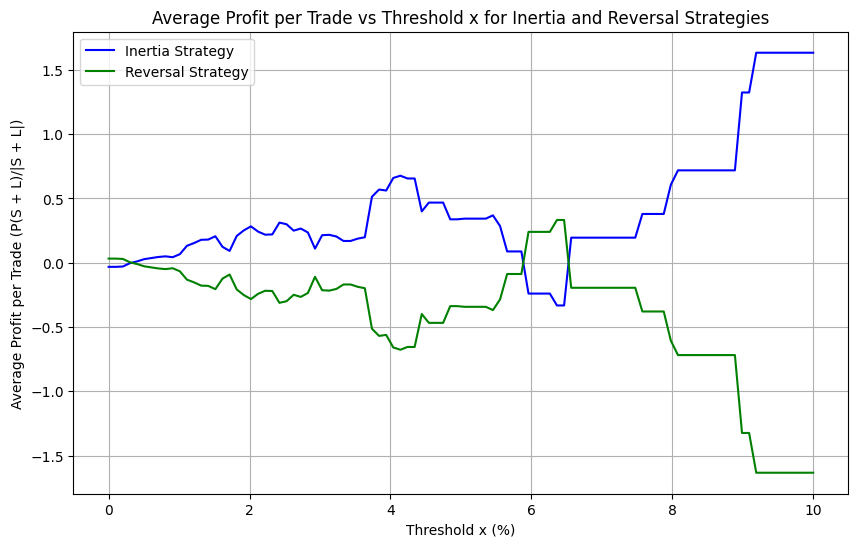

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate average profit per trade with a given threshold x
def calculate_avg_profit_per_trade(threshold, strategy_col):
    # Filter trades based on the threshold for overnight return
    filtered_df = df[np.abs(df['Overnight_Return']) > threshold]

    # Calculate total profit and number of trades (both long and short)
    total_profit = filtered_df[strategy_col].sum()
    num_trades = len(filtered_df)

    # Avoid division by zero if no trades are made
    avg_profit_per_trade = total_profit / num_trades if num_trades > 0 else 0

    return avg_profit_per_trade

# Generate 100 points for x ranging from 0 to 10% (0 to 0.1 in decimals)
x_values = np.linspace(0, 0.1, 100)
avg_profit_inertia = []
avg_profit_reversal = []

# Calculate average profit per trade for each x value
for x in x_values:
    avg_profit_inertia.append(calculate_avg_profit_per_trade(x, 'P/L_Inertia'))
    avg_profit_reversal.append(calculate_avg_profit_per_trade(x, 'P/L_Reversal'))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values * 100, avg_profit_inertia, label='Inertia Strategy', color='blue')
plt.plot(x_values * 100, avg_profit_reversal, label='Reversal Strategy', color='green')
plt.xlabel('Threshold x (%)')
plt.ylabel('Average Profit per Trade (P(S + L)/|S + L|)')
plt.title('Average Profit per Trade vs Threshold x for Inertia and Reversal Strategies')
plt.legend()
plt.grid(True)
plt.show()


> **💡Interpretation of Graph💡-**
>
> **Inertia Strategy** The blue line shows that, as the threshold x increases, the average profits per trade fluctuates slightly around 0, but begins to rise significantly arounf 5%, reaching peaks at higher threshold (8% - 10%). This suggests that trading only when the overnight return is larger (~5%) leads to higher profits. Inertial strategy benefits more decisive overnight moves.

> **Reversal Strategy** The green line shows a different pattern. The average profit per trade decreases as the threshold increases. After a small peak at lower thresholds (2%-3%), the profits decrease steadily, reaching negative values as rhe threshold rises above 5%. This suggests that larger overnight moves tend to work against the Reversal Strategy.

##### **Solution - 4**

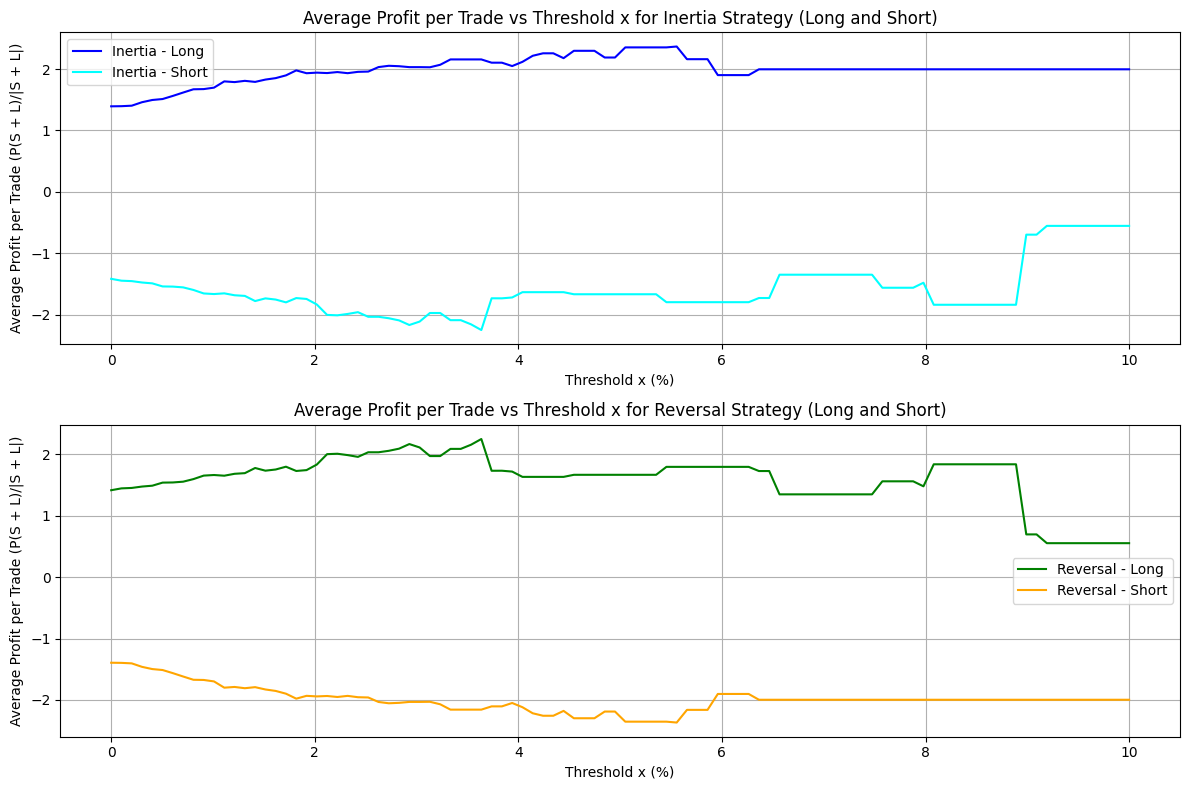

In [87]:
# Function to calculate average profit per trade for long and short positions separately
def calculate_avg_profit_per_trade_long_short(threshold, strategy_col, long_condition=True):
    # Filter trades based on the threshold for overnight return
    filtered_df = df[np.abs(df['Overnight_Return']) > threshold]

    # Filter for long or short trades
    if long_condition:
        filtered_df = filtered_df[filtered_df[strategy_col] > 0]  # Long positions
    else:
        filtered_df = filtered_df[filtered_df[strategy_col] < 0]  # Short positions

    # Calculate total profit and number of trades
    total_profit = filtered_df[strategy_col].sum()
    num_trades = len(filtered_df)

    # Avoid division by zero if no trades are made
    avg_profit_per_trade = total_profit / num_trades if num_trades > 0 else 0

    return avg_profit_per_trade

# Calculate average profit per trade for long and short positions
avg_profit_long_inertia = []
avg_profit_short_inertia = []
avg_profit_long_reversal = []
avg_profit_short_reversal = []

# Loop through different threshold values
for x in x_values:
    avg_profit_long_inertia.append(calculate_avg_profit_per_trade_long_short(x, 'P/L_Inertia', long_condition=True))
    avg_profit_short_inertia.append(calculate_avg_profit_per_trade_long_short(x, 'P/L_Inertia', long_condition=False))
    avg_profit_long_reversal.append(calculate_avg_profit_per_trade_long_short(x, 'P/L_Reversal', long_condition=True))
    avg_profit_short_reversal.append(calculate_avg_profit_per_trade_long_short(x, 'P/L_Reversal', long_condition=False))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot for Inertia strategy
plt.subplot(2, 1, 1)
plt.plot(x_values * 100, avg_profit_long_inertia, label='Inertia - Long', color='blue')
plt.plot(x_values * 100, avg_profit_short_inertia, label='Inertia - Short', color='cyan')
plt.xlabel('Threshold x (%)')
plt.ylabel('Average Profit per Trade (P(S + L)/|S + L|)')
plt.title('Average Profit per Trade vs Threshold x for Inertia Strategy (Long and Short)')
plt.legend()
plt.grid(True)

# Plot for Reversal strategy
plt.subplot(2, 1, 2)
plt.plot(x_values * 100, avg_profit_long_reversal, label='Reversal - Long', color='green')
plt.plot(x_values * 100, avg_profit_short_reversal, label='Reversal - Short', color='orange')
plt.xlabel('Threshold x (%)')
plt.ylabel('Average Profit per Trade (P(S + L)/|S + L|)')
plt.title('Average Profit per Trade vs Threshold x for Reversal Strategy (Long and Short)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


> **💡Interpretation of Code💡-**
>
> **Inertia Strategy**
*   **Long positions:** Profit increases as the threshold x increases, peaking near 6% and stabilizing near 2. Higher threshold appear to lead to higher profits.
*   **Short Positions:** Profit decreases steadily as the threshold x rises, leading to significant losses below -2.

> **Reversal Strategy**
*   **Long Positions:** Profit increases as the threshold x rises, stabilizing around 2 with peaks at 6% and 8%. Like inertial long positions remain profitable.





##### **Solution - 5**

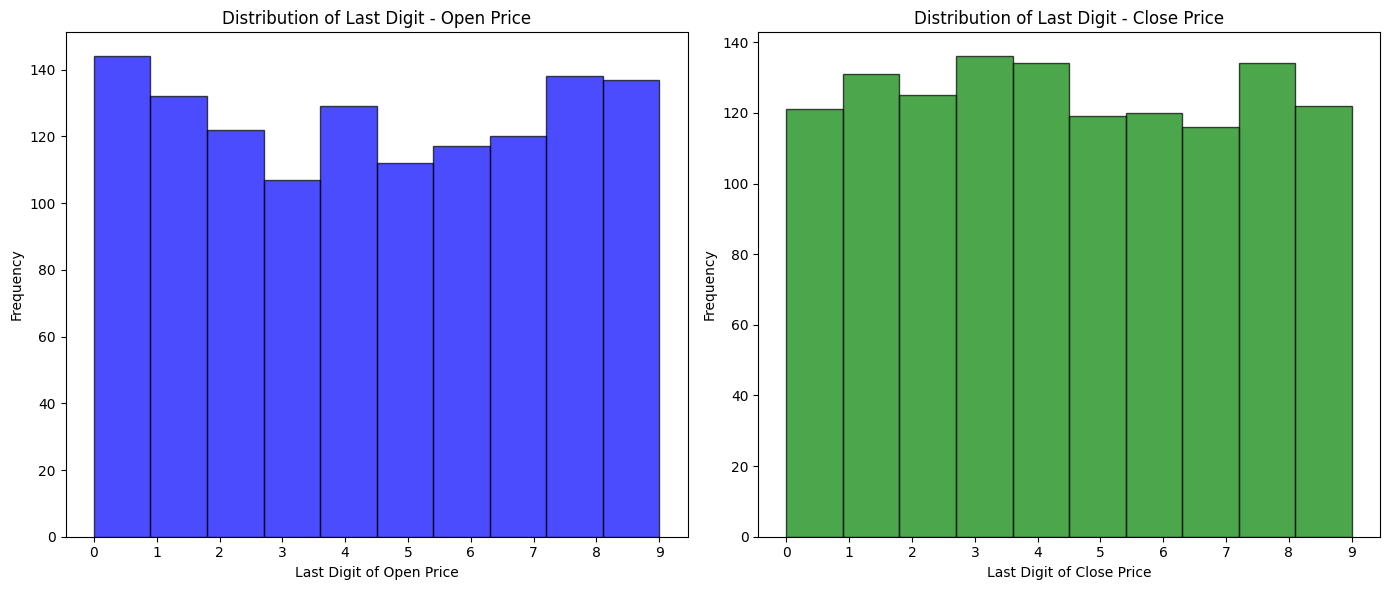

In [88]:
import matplotlib.pyplot as plt

# Extract the last digit of the integer part of the Open and Close prices
df['Last_Digit_Open'] = df['Open'].astype(int) % 10
df['Last_Digit_Close'] = df['Close'].astype(int) % 10

# Plot histograms for both Open and Close last digits
plt.figure(figsize=(14, 6))

# Histogram for Open prices
plt.subplot(1, 2, 1)
plt.hist(df['Last_Digit_Open'], bins=10, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Last Digit of Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Last Digit - Open Price')
plt.xticks(range(10))  # Ensure the x-axis ticks are set to 0-9

# Histogram for Close prices
plt.subplot(1, 2, 2)
plt.hist(df['Last_Digit_Close'], bins=10, edgecolor='black', color='green', alpha=0.7)
plt.xlabel('Last Digit of Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Last Digit - Close Price')
plt.xticks(range(10))

plt.tight_layout()
plt.show()


 **💡Interpretation of Graph💡-**

*   Open Price - Highest Frequency Digit: 0, Frequency: 144
*   Open Price - Lowest Frequency Digit: 3, Frequency: 107
*   Close Price - Highest Frequency Digit: 3, Frequency: 136
*   Close Price - Lowest Frequency Digit: 7, Frequency: 116
*   The distribution seem more uniform of Close Price across all the numbers compared to Open Price.





